# LOAD package

In [1]:
%pylab
from astropy.table import Table

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
from scipy.integrate import quad,trapz
from scipy.special import gamma
from scipy.optimize import curve_fit

In [3]:
import seaborn as sns
sns.set()
# sns.set(rc={'figure.figsize':(15.7,9.27)})
# sns.set_style("ticks")

# LOAD data

## total nwp

### 直接观测得到的N

In [4]:
cen_bin = [11.4, 11.6, 11.8]
sate_bin = [9.0, 9.5, 10.0, 10.5,11.0]
rvir = np.array([643.4968999301032,788.7737148534878 ])/1000

In [40]:
np.searchsorted?

Signature: np.searchsorted(a, v, side='left', sorter=None)
Docstring:
Find indices where elements should be inserted to maintain order.

Find the indices into a sorted array `a` such that, if the
corresponding elements in `v` were inserted before the indices, the
order of `a` would be preserved.

Assuming that `a` is sorted:

======  ============================
`side`  returned index `i` satisfies
======  ============================
left    ``a[i-1] < v <= a[i]``
right   ``a[i-1] <= v < a[i]``
======  ============================

Parameters
----------
a : 1-D array_like
    Input array. If `sorter` is None, then it must be sorted in
    ascending order, otherwise `sorter` must be an array of indices
    that sort it.
v : array_like
    Values to insert into `a`.
side : {'left', 'right'}, optional
    If 'left', the index of the first suitable location found is given.
    If 'right', return the last such index.  If there is no suitable
    index, return either 0 or N (where N is the 

In [5]:
r = np.logspace(-2, 2, 21)
r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)
# r_need = r_need[4:-2]
number = np.zeros((2,4))

for i in range(len(cen_bin)-1):
    for j in range(len(sate_bin)-1):
        data = np.load("/home/yunzheng/PAC/code/PAC/0_0.2/sdss_PAC_new/%.1f_%.1f.npy"%(cen_bin[i],sate_bin[j]),allow_pickle=True)
        index = np.searchsorted(r,rvir[i])
#         print("The index:",index)      #6
#         print("The r :",r[index])  #1.0

        rp_new = np.hstack((r[1:index],rvir[i]))
#         print("The rp:",rp_new)
        r_need_new = r_need[1:index]
#         print("The rneed new",r_need_new)
        nwp_new = data[1][1:index]



        r_inter = (np.log10(rp_new[-1])+np.log10(rp_new[-2]))/2.0
        print("The inter r:",r_inter)

        
        r_need_inter = np.array([np.log10(r_need_new[-2]),np.log10(r_need_new[-1])])
        print("the inter rneed bin:",r_need_inter)

        
        nwp_inter = np.array([np.log10(nwp_new[-2]),np.log10(nwp_new[-1])])
        print("the nwp interbin:",10**nwp_inter)

        
        f = interp1d(r_need_inter,nwp_inter)
        nwp_inter0 = f(r_inter)
        nwp_new = np.hstack((nwp_new[:-1],10**nwp_inter0))
        print("The nwp_inter:",10**nwp_inter0)

        
        print("the nwp_new:")
        print(nwp_new)
        N = np.zeros(len(rp_new)-1)
        print("The number for each bin:")
        for k in range(len(rp_new)-1):
            N[k] = np.pi * (rp_new[k+1]**2-rp_new[k]**2) * nwp_new[k]
            print(N[k])
        print("The total number:")
        print(np.sum(N)) 
        number[i][j] = np.sum(N)
        
np.save("./all/original_num2_test.npy",number)

The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [3.49764016 1.45828045]
The nwp_inter: 2.216615482094398
the nwp_new:
[14.71390823  9.35240611  6.07450786  3.49764016  2.21661548]
The number for each bin:
0.6988711055889302
1.1158155239593976
1.8204558080047448
2.6329594371129144
0.11128756068319616
The total number:
6.379389435349183
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [3.22194661 1.54832148]
The nwp_inter: 2.198820658811607
the nwp_new:
[16.45828042  9.92332358  5.46146149  3.22194661  2.19882066]
The number for each bin:
0.7817240973646391
1.1839304632004022
1.6367332984989986
2.425422386432008
0.11039415247057319
The total number:
6.1382043979666205
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [2.84979012 1.25630938]
The nwp_inter: 1.8593213380100992
the nwp_new:
[11.41601987  7.73290302  4.79807581  2.84979012  1.85932134]
The number for each bin:
0.5422302

In [6]:
number

array([[6.37938944, 6.1382044 , 5.14137009, 2.04824528],
       [9.17915203, 9.31486266, 7.30341662, 3.41056819]])

### 计算修正比例

In [94]:
nwp[0][:6]

array([0.07943282, 0.12589254, 0.19952623, 0.31622777, 0.50118723,
       0.79432823])

In [93]:
r_need0[:10]

array([0.01258925, 0.01995262, 0.03162278, 0.05011872, 0.07943282,
       0.12589254, 0.19952623, 0.31622777, 0.50118723, 0.79432823])

In [96]:
r_need0[:5]

array([0.01258925, 0.01995262, 0.03162278, 0.05011872, 0.07943282])

In [95]:
nwp[0][1:6]

array([0.12589254, 0.19952623, 0.31622777, 0.50118723, 0.79432823])

In [7]:
r0 = np.logspace(-2, 2, 21)
# r = r[4:]
r_need0 = 10**((np.log10(r0[1:])+np.log10(r0[:-1]))/2.0)
number_new = np.zeros((2,4))
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i in range(len(cen_bin)-1):
    for j in range(len(sate_bin)-1):
        nwp = np.load("/home/yunzheng/PAC/code/PAC/0_0.2/sdss_PAC_new/%.1f_%.1f.npy"%(cen_bin[i],sate_bin[j]),allow_pickle=True)
        
        def func_wp(rp,r1,gam):
            y = rp**(1-gam)*r1**gam*gamma(0.5)*gamma(0.5*(gam-1))/gamma(0.5*gam)
            return y
        
        
        popt,pcov = curve_fit(func_wp,nwp[0][1:7],nwp[1][1:7],sigma = nwp[2][1:7],p0=(5,2.05))
        print(popt)
        perr = np.sqrt(np.diag(pcov))
#         print(perr)
        
#         plt.plot(nwp[0],nwp[1],color = color[j])
#         plt.plot(r_need0[:11],func_wp(r_need0[:11],*popt),color = color[j])
#         plt.xscale("log")
#         plt.yscale("log")
#         plt.xlim(0.01,10)
#         plt.ylim(0.1,1000)
        
        
        def part_wp1(r,rp0,r1,gam):
            y = 2*r1**gam*r**(1-gam)*(r**2 - rp0**2)**(-0.5)
            return y
        
        def func_wp1(rp,rvir0,r1,gam):
            y = quad(part_wp1,rp,rvir0,args = (rp,r1,gam))
            return y
        

##############calculate ratio###########
        nwp_new = func_wp(r_need0[:5],*popt)
        index = np.searchsorted(r0,rvir[i])
#         print("The index:",index)      #10


        nwp_new = np.hstack((nwp_new,nwp[1][1:index-4]))
#         print("The nwp_new:",nwp_new)
        rp_new = np.hstack((r0[:index],rvir[i]))
        r_need_new = r_need0[:index]
        print(r_need_new)


        r_inter = (np.log10(rp_new[-1])+np.log10(rp_new[-2]))/2.0
        print("The inter r:",r_inter)

        
        r_need_inter = np.array([np.log10(r_need_new[-2]),np.log10(r_need_new[-1])])
        print("the inter rneed bin:",r_need_inter)

        
        nwp_inter = np.array([np.log10(nwp_new[-2]),np.log10(nwp_new[-1])])
        print("the nwp interbin:",10**nwp_inter)

        
        f = interp1d(r_need_inter,nwp_inter,fill_value ='extrapolate')
        nwp_inter0 = f(r_inter)
        nwp_new = np.hstack((nwp_new[:-1],10**nwp_inter0))
        print("The nwp_inter:",10**nwp_inter0)


        N = np.zeros(len(rp_new)-1)
        for k in range(len(rp_new)-1):
            ratio_corr = (func_wp1(rp_new[k],rvir[i],popt[0],popt[1])[0])/func_wp(rp_new[k],popt[0],popt[1])
            print("The corr ratio:")
            print(ratio_corr)
            N[k] = np.pi * (rp_new[k+1]**2-rp_new[k]**2) * nwp_new[k] * ratio_corr

        number_new[i][j] = np.sum(N)
np.save("./all/corr_num2_test.npy",number_new)

[0.71735249 2.20522367]
[0.01258925 0.01995262 0.03162278 0.05011872 0.07943282 0.12589254
 0.19952623 0.31622777 0.50118723 0.79432823]
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [3.49764016 1.45828045]
The nwp_inter: 2.216615482094398
The corr ratio:
0.9960339549447494
The corr ratio:
0.9930907294612669
The corr ratio:
0.9879620682862102
The corr ratio:
0.9790209855861609
The corr ratio:
0.9634148657892508
The corr ratio:
0.9360925951257115
The corr ratio:
0.8878824180825708
The corr ratio:
0.8009991177974523
The corr ratio:
0.6338999290684247
The corr ratio:
0.14276324123630765
[0.69795958 2.32095151]
[0.01258925 0.01995262 0.03162278 0.05011872 0.07943282 0.12589254
 0.19952623 0.31622777 0.50118723 0.79432823]
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [3.22194661 1.54832148]
The nwp_inter: 2.198820658811607
The corr ratio:
0.997624904782195
The corr ratio:
0.9956358178115886
The corr ratio:
0.9919

In [8]:
number_new

array([[6.21424687, 6.55187697, 5.03695299, 1.96499007],
       [8.19546958, 8.78983788, 7.56691768, 2.59157893]])

In [104]:
number

array([[ 3.78084832,  5.2882553 ,  4.72729346,  2.12829986],
       [ 6.76388127, 10.02689583,  9.05206361,  4.14363143]])

In [105]:
number_new / number

array([[0.84782269, 0.98451179, 0.95103228, 0.91518103],
       [0.81976534, 0.96679945, 0.98711682, 0.85577764]])

## LOAD each field nwp

In [9]:
r = np.logspace(-2, 2, 21)
r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)

m_sate = [9.0,9.5,10.0,10.5,11.0]
m_cen = [11.4,11.6,11.8]

jack=50
zs = ['0p075','0p125']

num0 = np.load("./all/original_num2_test.npy")
num1 = np.load("./all/corr_num2_test.npy")
fq_original = num1/num0


number = np.zeros((2,4,50))
for i in range(len(cen_bin)-1):
    for j in range(len(sate_bin)-1):
        
        pcf = np.zeros((jack,len(r_need)))
        para1 = 0
        for k in range(len(zs)):
            data = np.load('/home/yunzheng/PAC/code/PAC/0_0.2/sdss_PAC/%s_%.1f_%.1f_results_jack.npy' % (zs[k],m_cen[i],m_sate[j]))
            para = np.load('/home/yunzheng/PAC/code/PAC/0_0.2/sdss_PAC/%s_%.1f_%.1f_param_jack.npy' % (zs[k],m_cen[i],m_sate[j]))


            pcf += (data * para)
            para1 += para

        pcf = pcf / para1
        
        
        for q in range(50):
            
            index = np.searchsorted(r,rvir[i])
            print("The index rvir:")
            print(index)
            print(r[index])


        
            nwp_new = pcf[q][1:index]
            rp_new = np.hstack((r[1:index],rvir[i]))
            r_need_new = r_need[1:index]
    #         print(r_need_new)


            r_inter = (np.log10(rp_new[-1])+np.log10(rp_new[-2]))/2.0
            print("The inter r:",r_inter)


            r_need_inter = np.array([np.log10(r_need_new[-2]),np.log10(r_need_new[-1])])
            print("the inter rneed bin:",r_need_inter)


            nwp_inter = np.array([np.log10(nwp_new[-2]),np.log10(nwp_new[-1])])
            print("the nwp interbin:",10**nwp_inter)


            f = interp1d(r_need_inter,nwp_inter)
            nwp_inter0 = f(r_inter)
            nwp_new = np.hstack((nwp_new[:-1],10**nwp_inter0))
            print("The nwp_inter:",10**nwp_inter0)


            N = np.zeros(len(rp_new)-1)
            for p in range(len(rp_new)-1):
                N[p] = np.pi * (rp_new[p+1]**2-rp_new[p]**2) * nwp_new[p] * fq_original[i][j]

            print("The total number:")
            print(np.sum(N))
            
            number[i][j][q] = np.sum(N)
np.save("./all/eachfield_result2_test.npy",number)

The index rvir:
6
1.0
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [3.54149333 1.48072473]
The nwp_inter: 2.2477021445732617
The total number:
6.315610488777708
The index rvir:
6
1.0
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [3.50250461 1.44263417]
The nwp_inter: 2.205650739552382
The total number:
6.282621893132182
The index rvir:
6
1.0
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [3.51723369 1.49468121]
The nwp_inter: 2.2513038535094347
The total number:
6.2630770915561005
The index rvir:
6
1.0
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [3.4545309 1.4858166]
The nwp_inter: 2.2250925340249754
The total number:
6.178391126868498
The index rvir:
6
1.0
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [3.4344319  1.41498574]
The nwp_inter: 2.1630936483232204
The total number:
6.1118682021515

# red galaxy 

## all red galaxy

In [10]:
r = np.logspace(-2, 2, 21)
r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)
# r_need = r_need[4:-2]
number = np.zeros((2,4))

for i in range(len(cen_bin)-1):
    for j in range(len(sate_bin)-1):
        data = np.load("/home/yunzheng/PAC/code/PAC/0_0.2/color_cut_red_new/%.1f_%.1f.npy"%(cen_bin[i],sate_bin[j]),allow_pickle=True)
        index = np.searchsorted(r,rvir[i])
        
        nwp_new = data[1][1:index]
        rp_new = np.hstack((r[1:index],rvir[i]))
        r_need_new = r_need[1:index]
#         print(r_need_new)


        r_inter = (np.log10(rp_new[-1])+np.log10(rp_new[-2]))/2.0
        print("The inter r:",r_inter)

        
        r_need_inter = np.array([np.log10(r_need_new[-2]),np.log10(r_need_new[-1])])
        print("the inter rneed bin:",r_need_inter)

        
        nwp_inter = np.array([np.log10(nwp_new[-2]),np.log10(nwp_new[-1])])
        print("the nwp interbin:",10**nwp_inter)

        
        f = interp1d(r_need_inter,nwp_inter)
        nwp_inter0 = f(r_inter)
        nwp_new = np.hstack((nwp_new[:-1],10**nwp_inter0))
        print("The nwp_inter:",10**nwp_inter0)

        
        print("the nwp_new:")
        print(nwp_new)
        N = np.zeros(len(rp_new)-1)
        print("The number for each bin:")
        for k in range(len(rp_new)-1):
            N[k] = np.pi * (rp_new[k+1]**2-rp_new[k]**2) * nwp_new[k]
            print(N[k])
        print("The total number:")
        print(np.sum(N)) 
        number[i][j] = np.sum(N)
        
np.save("./red_galaxy/original_num2_test.npy",number)

The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [1.96113609 0.80832847]
The nwp_inter: 1.2354453761711548
the nwp_new:
[11.34753633  6.85801971  3.89796656  1.96113609  1.23544538]
The number for each bin:
0.5389774854657304
0.8182156299007215
1.168172966638665
1.4763073240638964
0.06202686184502896
The total number:
4.063700267914042
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [2.26392791 1.02180901]
The nwp_inter: 1.495320573336372
the nwp_new:
[14.27526454  8.32217665  4.48863994  2.26392791  1.49532057]
The number for each bin:
0.6780367089278196
0.9929010550571548
1.3451905615003699
1.7042434589121687
0.07507417519648828
The total number:
4.795445959594001
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [2.37752619 1.06136612]
The nwp_inter: 1.5613905812182327
the nwp_new:
[10.64887559  6.92109601  4.25779515  2.37752619  1.56139058]
The number for each bin:
0.5057929

In [11]:
number

array([[4.06370027, 4.79544596, 4.47569275, 1.88710356],
       [6.32168125, 7.95939333, 6.60967041, 3.22921299]])

## 修正比例

In [110]:
r0

array([1.00000000e-02, 1.58489319e-02, 2.51188643e-02, 3.98107171e-02,
       6.30957344e-02, 1.00000000e-01, 1.58489319e-01, 2.51188643e-01,
       3.98107171e-01, 6.30957344e-01, 1.00000000e+00, 1.58489319e+00,
       2.51188643e+00, 3.98107171e+00, 6.30957344e+00, 1.00000000e+01,
       1.58489319e+01, 2.51188643e+01, 3.98107171e+01, 6.30957344e+01,
       1.00000000e+02])

In [112]:
r_need0[:10]

array([0.01258925, 0.01995262, 0.03162278, 0.05011872, 0.07943282,
       0.12589254, 0.19952623, 0.31622777, 0.50118723, 0.79432823])

In [12]:
r0 = np.logspace(-2, 2, 21)
# r0 = r0[4:]
r_need0 = 10**((np.log10(r0[1:])+np.log10(r0[:-1]))/2.0)
number_new = np.zeros((2,4))

for i in range(len(cen_bin)-1):
    for j in range(len(sate_bin)-1):
        nwp = np.load("/home/yunzheng/PAC/code/PAC/0_0.2/color_cut_red_new/%.1f_%.1f.npy"%(cen_bin[i],sate_bin[j]),allow_pickle=True)
        
        def func_wp(rp,r1,gam):
            y = rp**(1-gam)*r1**gam*gamma(0.5)*gamma(0.5*(gam-1))/gamma(0.5*gam)
            return y
        
        
        popt,pcov = curve_fit(func_wp,nwp[0][1:7],nwp[1][1:7],sigma = nwp[2][1:7],p0=(5,2.05))
        print(popt)
        perr = np.sqrt(np.diag(pcov))
        print(perr)
        
        
        def part_wp1(r,rp0,r1,gam):
            y = 2*r1**gam*r**(1-gam)*(r**2 - rp0**2)**(-0.5)
            return y
        
        def func_wp1(rp,rvir0,r1,gam):
            y = quad(part_wp1,rp,rvir0,args = (rp,r1,gam))
            return y
        

###############calculate ratio###########
        nwp_new = func_wp(r_need0[:5],*popt)
        index = np.searchsorted(r0,rvir[i])
#         print("The index:",index)     #10
        
    
        nwp_new = np.hstack((nwp_new,nwp[1][1:index-4]))
#         nwp_new = nwp[1][1:index]
        rp_new = np.hstack((r0[:index],rvir[i]))
        r_need_new = r_need0[:index]
        print(r_need_new)


        r_inter = (np.log10(rp_new[-1])+np.log10(rp_new[-2]))/2.0
        print("The inter r:",r_inter)

        
        r_need_inter = np.array([np.log10(r_need_new[-2]),np.log10(r_need_new[-1])])
        print("the inter rneed bin:",r_need_inter)

        
        nwp_inter = np.array([np.log10(nwp_new[-2]),np.log10(nwp_new[-1])])
        print("the nwp interbin:",10**nwp_inter)

        
        f = interp1d(r_need_inter,nwp_inter)
        nwp_inter0 = f(r_inter)
        nwp_new = np.hstack((nwp_new[:-1],10**nwp_inter0))
        print("The nwp_inter:",10**nwp_inter0)


        N = np.zeros(len(rp_new)-1)
        for k in range(len(rp_new)-1):
            ratio_corr = (func_wp1(rp_new[k],rvir[i],popt[0],popt[1])[0])/func_wp(rp_new[k],popt[0],popt[1])
            print("The corr ratio:")
            print(ratio_corr)
            N[k] = np.pi * (rp_new[k+1]**2-rp_new[k]**2) * nwp_new[k] * ratio_corr

        number_new[i][j] = np.sum(N)
np.save("./red_galaxy/corr_num2_test.npy",number_new)

[0.57746055 2.42113747]
[0.0186552  0.10261133]
[0.01258925 0.01995262 0.03162278 0.05011872 0.07943282 0.12589254
 0.19952623 0.31622777 0.50118723 0.79432823]
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [1.96113609 0.80832847]
The nwp_inter: 1.2354453761711548
The corr ratio:
0.9984741477084024
The corr ratio:
0.9970638858852231
The corr ratio:
0.9943495476470176
The corr ratio:
0.9891227546805752
The corr ratio:
0.9790458042858944
The corr ratio:
0.9595585960819376
The corr ratio:
0.921575033231653
The corr ratio:
0.8459457042369709
The corr ratio:
0.6851455502084555
The corr ratio:
0.158933440556798
[0.6173026  2.45937804]
[0.02573676 0.11996368]
[0.01258925 0.01995262 0.03162278 0.05011872 0.07943282 0.12589254
 0.19952623 0.31622777 0.50118723 0.79432823]
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [2.26392791 1.02180901]
The nwp_inter: 1.495320573336372
The corr ratio:
0.9987108638215193
The corr r

In [13]:
number_new

array([[4.69425442, 5.72890778, 4.62489706, 1.87025331],
       [6.32268016, 8.22718708, 7.24317838, 2.52601944]])

## each field

In [14]:
r = np.logspace(-2, 2, 21)
r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)

m_sate = [9.0,9.5,10.0,10.5,11.0]
m_cen = [11.4,11.6,11.8]

jack=50
zs = ['0p075','0p125']


num0 = np.load("./red_galaxy/original_num2_test.npy")
num1 = np.load("./red_galaxy/corr_num2_test.npy")
fq_original = num1/num0


number = np.zeros((2,4,50))
for i in range(len(cen_bin)-1):
    for j in range(len(sate_bin)-1):
        
        pcf = np.zeros((jack,len(r_need)))
        para1 = 0
        for k in range(len(zs)):
            data = np.load('/home/yunzheng/PAC/code/PAC/0_0.2/color_cut_red/%s_%.1f_%.1f_results_jack.npy' % (zs[k],m_cen[i],m_sate[j]))
            para = np.load('/home/yunzheng/PAC/code/PAC/0_0.2/color_cut_red/%s_%.1f_%.1f_param_jack.npy' % (zs[k],m_cen[i],m_sate[j]))


            pcf += (data * para)
            para1 += para

        pcf = pcf/para1
        
        
        for q in range(50):
            
            index = np.searchsorted(r,rvir[i])
            print("The index rvir:")
            print(index)
            print(r[index])


        
            nwp_new = pcf[q][1:index]
            rp_new = np.hstack((r[1:index],rvir[i]))
            r_need_new = r_need[1:index]
    #         print(r_need_new)


            r_inter = (np.log10(rp_new[-1])+np.log10(rp_new[-2]))/2.0
            print("The inter r:",r_inter)


            r_need_inter = np.array([np.log10(r_need_new[-2]),np.log10(r_need_new[-1])])
            print("the inter rneed bin:",r_need_inter)


            nwp_inter = np.array([np.log10(nwp_new[-2]),np.log10(nwp_new[-1])])
            print("the nwp interbin:",10**nwp_inter)


            f = interp1d(r_need_inter,nwp_inter)
            nwp_inter0 = f(r_inter)
            nwp_new = np.hstack((nwp_new[:-1],10**nwp_inter0))
            print("The nwp_inter:",10**nwp_inter0)


            N = np.zeros(len(rp_new)-1)
            for p in range(len(rp_new)-1):
                N[p] = np.pi * (rp_new[p+1]**2-rp_new[p]**2) * nwp_new[p] * fq_original[i][j]

            print("The total number:")
            print(np.sum(N))
            
            number[i][j][q] = np.sum(N)
np.save("./red_galaxy/eachfield_result2_test.npy",number)

The index rvir:
6
1.0
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [1.99983572 0.84359587]
The nwp_inter: 1.2751317865880627
The total number:
4.787723099595256
The index rvir:
6
1.0
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [1.96117591 0.78264757]
The nwp_inter: 1.2148351911216653
The total number:
4.741565596686678
The index rvir:
6
1.0
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [1.96225704 0.8184977 ]
The nwp_inter: 1.2438646706662928
The total number:
4.744615832744038
The index rvir:
6
1.0
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [1.93183637 0.83263902]
The nwp_inter: 1.2456726540118823
The total number:
4.65475989500671
The index rvir:
6
1.0
The inter r: -0.19572677049206816
the inter rneed bin: [-0.3 -0.1]
the nwp interbin: [1.93940522 0.79273297]
The nwp_inter: 1.2164551540401534
The total number:
4.627030193973

# result

In [15]:
red_num = np.load("./red_galaxy/eachfield_result2_test.npy")
all_num = np.load("./all/eachfield_result2_test.npy")

In [16]:
result = np.mean(red_num / all_num,axis = 2) 

In [17]:
result

array([[0.75539497, 0.87438119, 0.91818901, 0.95178658],
       [0.77147024, 0.93595722, 0.95719055, 0.97470156]])

In [18]:
sigma = np.sqrt(49) * np.std(red_num / all_num,axis = -1) 

In [19]:
np.save("./result2_test.npy",np.array([result,sigma]))

(0.45, 1.02)

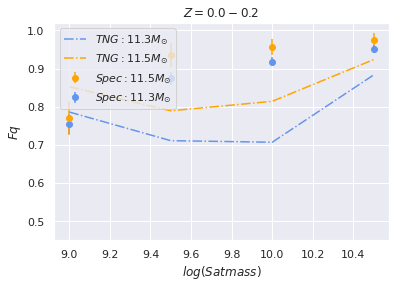

In [20]:
cen_bin = [11.3, 11.5, 11.7]
sate_bin = [9.0, 9.5, 10.0, 10.5,11.0]
color0 = ['cornflowerblue','orange']   #######e','seagreen',
for i in range(2):
    for j in range(4):
       
        if j==3:
            continue
        data = np.load("./result2_test.npy")
        plt.errorbar(sate_bin[j],data[0][i][j],data[1][i][j],color = color0[i],fmt = 'o')
plt.errorbar(sate_bin[-2],data[0][1][3],data[1][1][3],color = color0[1],fmt = 'o',label = "$Spec : %s M_{\odot}$"%cen_bin[1])
plt.errorbar(sate_bin[3],data[0][0][3],data[1][0][3],color = color0[0],fmt = 'o',label = "$Spec : %s M_{\odot}$"%cen_bin[0])

TNG = np.load("./TNG_fq.npz")
plt.plot(sate_bin[:-1],TNG['version2'][0],color = color0[0],linestyle = '-.',label = "$TNG : 11.3 M_{\odot}$")
plt.plot(sate_bin[:-1],TNG['version2'][1],color = color0[1],linestyle = '-.',label = "$TNG : 11.5 M_{\odot}$")


plt.xlabel("$log(Sat mass)$")
plt.ylabel("$Fq$")
plt.legend(loc = "upper left")
plt.title("$Z = 0.0 - 0.2$")
plt.ylim(0.45,1.02)
# plt.plot()
# plt.savefig("/home/yunzheng/PAC/picture/PCF_colorcut/Fq_0.3.pdf",dpi = 100)